# Cake Eating Problem

Some of this content came from the great [QuantEcon lectures on the](https://python.quantecon.org/cake_eating_problem.html) [cake eating problem](https://python.quantecon.org/cake_eating_numerical.html)!

The intertemporal problem presented by the cake eating problem is: how much to enjoy today and how much to leave
for the future?

Although the topic sounds trivial, this kind of trade-off between current and future utility is at the heart of many economic problems. Once we master the ideas in this simple environment, we will apply them to progressively more challenging—and useful—problems.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.interpolate as interp
import scipy.optimize as opt

%matplotlib inline

## Problem definition

We consider an infinite time horizon $t = 0, 1, 2, 3\dots$

At $t = 0$ the agent is given a cake with size $\bar{x}$.

The agent must choose how much cake to consume at each time period, $c_t$, with the restriction that

$$\sum_{t=0}^\infty c_t \leq \bar{x}$$

Consuming quantity $c$ of the cake gives current utility $u(c)$.

The agent discounts the future with discount factor $\beta$ so that their total utility over the infinite time horizon is

$$v(\bar{x}) = \sum_{t=0}^{\infty} \beta^t u(c_t)$$

We stick with the commonly used CRRA utility function

$$u(c) = \frac{c^{1-\gamma}}{1-\gamma} \qquad (\gamma > 1)$$


## Understanding the parameters

Let's take a brief pause to think about the implications that different parameters will have:

* $\beta$: As we increase $\beta$, the individual will weights the future flow utility more. This means that they should consume less today and more tomorrow -- In fact, as $\beta \rightarrow 1$, the individual will want to consume an equal amount each period.
* $\gamma$: As we increase $\gamma$, we add curvature to the utility function which raises the marginal utility. A higher marginal utility means that utility falls faster with consumption which should increase the amount of consumption smoothing across periods.

## Directly solving the sequential problem

In such a simple setting (and with CRRA utility!), we can actually directly solve the sequential problem...

This is useful in the sense that it will give us a benchmark to check the solution that we obtain via dynamic programming. We can set up the Lagrangian to get

\begin{align*}
  \mathcal{L} &= \sum_{t=0}^{\infty} \left[ \beta^t u(c_t) \right] - \lambda \left(\sum_{t=0}^{\infty} [c_t] - \bar{x} \right)
\end{align*}

Taking the derviative w.r.t. $c_t$ provides

\begin{align*}
  \lambda &= \beta^t u'(c_t)
\end{align*}

We can combine this with the derivative w.r.t. $c_{t+1}$ to get an equation that we will call the Euler equation

\begin{align*}
  \beta &= \frac{u'(c_{t})}{u'(c_{t+1})}
\end{align*}

which after we plug in functional forms can be reduced to

\begin{align*}
  \frac{c_{t+1}}{c_t} &= \beta^{\frac{1}{\gamma}}
\end{align*}

This gives us a law of motion for $c_t$,

\begin{align*}
  c_{t+1} &= \beta^{\frac{1}{\gamma}} c_{t}
\end{align*}

Monotonicity in the utility function implies that the agent will "want to eat everything eventually", i.e. $\sum_{t=0}^\infty c_t = \bar{x}$.

This can then be used to back out an expression for $c_0$ which can then be used to compute $c_t$

\begin{align*}
  \sum_{t=0}^{\infty} c_t &= \bar{x} \\
  \sum_{t=0}^{\infty} \beta^{\frac{t}{\gamma}} c_0 &= \bar{x} \\
  \frac{1}{1 - \beta^{\frac{1}{\gamma}}} c_0 &= \bar{x} \\
  c_0 &= (1 - \beta^{\frac{1}{\gamma}}) \bar{x} \\
  c_t &= \beta^{\frac{t}{\gamma}} (1 - \beta^{\frac{1}{\gamma}}) \bar{x}
\end{align*}

We can verify this solution numerically

In [ ]:
beta = 0.75
gamma = 2
xbar = 1.0

c0 = (1 - beta**(1/gamma)) * xbar
ct_sequence = [beta**(t/gamma)*c0 for t in range(10)] # t is the years and in this case this person lived 10mil years lol

sum(ct_sequence)

0.7626953125000002

the discount factor ; if you change this; the coefficent of how they value this utility in the future ;

if you raise this facotr it will indicate how mucht ehy value it

when theyre thinking about it in time - 0, on data 0 they can figure out what they will eat for the rest of their life

as you make beta larger ; this indicates how much the agent values the cake in future.

if you set beta to 0.01 for example, this says they will eat 90% of their cake today and stretch out the rest of the cake for their life time

if you make bta 0 they will just 1 * X bar so they will eat everything

beta is the discount factor! i get it now. thats why its denoted as in inverse :)))))

## Setting up the dynamic program

Let's begin by looking at the total utility that an individual receives,

$$v(\bar{x}) = \sum_{t=0}^{\infty} \beta^t u(c_t)$$

This can be separated into today's utility (flow value) and all utility going forward (continuation value)

$$v(\bar{x}) = \underbrace{u(c_0)}_{\text{flow utility}} + \underbrace{\beta \sum_{t=1}^{\infty} \beta^{t-1} u(c_t)}_{\text{continuation utility}}$$

The continuation value looks very similar to the original expression for $v(\bar{x})$ except that once we've consumed $c_0$, we will only have $\bar{x} - c_0$ going forward.

We make the observation that the value of all future utility can be summarized by just how much cake is left $x_{t+1} = x_t - c_t$.

We use this fact to write the Bellman equation as:

\begin{align*}
  v(x_t) &= \max_{0 \leq c_t  \leq x} u(c_t) + \beta v(x_t - c_t)
\end{align*}

A solution to the dynamic program consists of two functions:

1. A value function, $v^*(x): \mathcal{R}^+ \rightarrow \mathcal{R}$. The value function describes the value to the agent of beginning a particular period with $x$ cake remaining
2. A policy function, $c^*(x): \mathcal{R}^+ \rightarrow [0, x]$. The policy function describes the optimal level of consumption that an individual should choose given $x$ cake remaining

These two functions must satisfy the Bellman equation and $c^*(x)$ must be the maximizing choice of consumption.

V star is the value function that says how much lifetime utilit you will recieve given a ceatin level of your cake. in the one cake example its the entire discounted sum of the utility of the cake. after you ate some in preiod take that from x bar. sum of beta to the t u of ct

Policy function if i have this much cake today, how much should I eat

These two functions must be such that this bellman equation is true

c star is the maxmimizng function onf consumption

now where do we get these functions???
* could you find multiple v's and c's? no there is always one v and one c
* the unknowns in your problem are entire functions

The value of having Xbar (your cake)

U(C0) = flow utility + Continuation Utility

Dynamic programming seeks to optimize today and i know i will ptimize everything in the future

* Recursive equation because we have functions on the right and left but we dont know what this function
* in order to figure out what our Cnot is, we can figure out V to tell me how much to eat today
* State Variable: summarize all of the relvant information up to today
* * you dont care how you got to this ammount of cake, you care that this is the amount of cake that you have

Epstien-Zein preferences - allows you to separte risk aversion and discounting more sperately instead of the additve relationship



### Solving the dynamic program

We will discuss two strategies for solving this dynamic program. Both rely on certain conditions being met, but we will postpone this technical discussion for now (we promise the conditions are met for the cake eating problem we describe):

1. Value iteration: Treats the value function, $v(x)$, as the object of interest
2. Policy iteration: Treats the policy function, $c(x)$, as the object of interest

In [ ]:
# Define class for convenience of methods and parameter passing
class CakeEating(object):
    def __init__(self, beta=0.9, gamma=2.0, xbar=2.5, nx=75):
        self.beta = beta
        self.gamma = gamma
        self.xbar = xbar
        self.xgrid = np.linspace(1e-2, xbar, nx)

    def u(self, c):
        return c**(1 - self.gamma) / (1 - self.gamma)

    def action_state_value(self, c, x, v):
        """
        Given a value function, `v`, computes
        the value of taking action `c` for
        state `x`

        if you can tell me what

        """
        return self.u(c) + self.beta*v(x - c)


### Approximating $c$ and $v$

The size of the cake is a continuous variable... We won't be able to iterate over all values between 0 and $x$ so instead we choose a grid of $N$ values $x_0 < x_1 < \dots < x_N$ to use to approximate the function.

If we have the value of our function at each of these grid points, then we can numerically approximate the grid by using interpolation. In particular, we will use piecewise linear functions which approximate a function according to the following rules:

Let $f$ be a function that we are approximating and $x$ be the value we want to approximate the function at. Let $x_i \leq x \leq x_{i+1}$ then

$$\tilde{f}(x) = f(x_i) + \frac{f(x_{i+1}) - f(x_i)}{x_{i+1} - x_{i}} (x - x_i)$$


## Value Iteration

Value iteration begins by treating the value function, $v(x)$, as the object of interest.

1. Initialize a guess at an initial state-value function -- It is common to use $v_0(x) = 0 \;\forall x$ as an initial guess.
2. Compute $v_{n+1}(x) = \max_{0 \leq c \leq x} u(c) + \beta v_n(x - c)$ for each value $x$
3. Compare whether new value is approximately equal to previous value -- If so, finish, otherwise return to 2

4. the object of interest is the presetn deiscounted utility of the agent

5. it takes in the cake you have eaten and the cake you have left

In [ ]:
def bellman_equation(ce, x, v):
    """
    Given a value function `v`, computes the maximum value
    associated with being in state x.

    For convenience, it also returns the optimal decision made
    """
    # Optimize
    sol = opt.minimize_scalar(
        lambda c: -ce.action_state_value(c, x, v),
        bounds=(1e-8, x-1e-10), method="bounded"
    )

    return sol.x, -sol.fun # you're passing in a negative because its minimizing not maxmimizng


def value_iteration(ce):
    """
    Computes the optimal policy function and value function
    via value iteration
    """
    v_np1 = np.zeros_like(ce.xgrid) # start with a guess of all zeros
    v_n = v_np1.copy() + 100.0 # next input a guess of all 100s
    c_star = np.zeros_like(ce.xgrid)

    dist = 100.0 # distance
    citer = 0 # current iteration
    while dist > 1e-3:
        citer += 1
        if citer % 25 == 0:
            print(f"Current iteration: {citer}")
            print(f"Current distance: {dist}")

        # Create interpolator ; if you tell it a point thats not inside the grid it will linearly extrapolate between those two points
        np.copyto(v_n, v_np1)
        v = interp.interp1d(
            ce.xgrid, v_n,
            fill_value="extrapolate"
        )

        for (i, x) in enumerate(ce.xgrid): # we need a grid that we will appproximate the function over and at
            _c, _v = bellman_equation(ce, x, v) # the ammout of consumtuntin that we should choose given our value function
            c_star[i] = _c # the bellman gives us a new function and saves it as v and s tar
            v_np1[i] = _v
        dist = np.max(np.abs(v_np1 - v_n)) # the maxmium absolute distance between those two grids for every grid point and
    # and the distance between the two function is the sume of all those distance points
    return c_star, v_np1

In [ ]:
%%time

ce = CakeEating()

cstar_vf, vstar_vf = value_iteration(ce)

Current iteration: 25
Current distance: 13.555490478661568
Current iteration: 50
Current distance: 0.9750212466049106
Current iteration: 75
Current distance: 0.06999747707482129
Current iteration: 100
Current distance: 0.005025105223921855
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 10.6 s


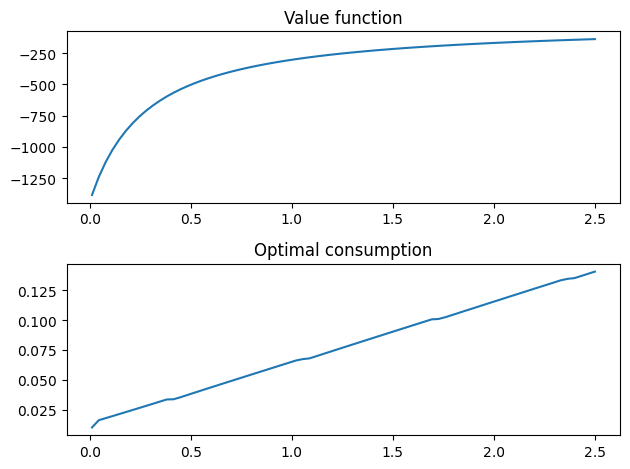

In [ ]:
fig, ax = plt.subplots(2)

ax[0].plot(ce.xgrid, vstar_vf)
ax[0].set_title("Value function")
ax[1].plot(ce.xgrid, cstar_vf)
ax[1].set_title("Optimal consumption")

fig.tight_layout()

Visualizations :
* the optimial function has some discontiuation
* for the utitliy function is it worth it to start at 1 or 1.5 such as giving an inhertiance to children ?

## Policy Iteration

Policy iteration begins by treating the policy function, $c(x)$, as the object of interest.

1. Initialize a guess for the optimal policy -- We will choose $c_0(x) = \frac{x}{2}$ which will always respect the budget constraint even if it is clearly suboptimal.
2. Take the policy as given and compute $\tilde{v}_{n}(x)$ as the value an agent would have in state $x$ if the agent followed the policy $c_{n}(x)$.
  - This is done by iterating on $v_{n+1}(x) = u(c_0(x)) + \beta v_{n}(x - c_0(x))$ until $v_n(x) \approx v_{n+1}(x)$ and then $\tilde{v}_n(x) \equiv v_{n+1}(x)$
3. Compute the optimal policy for $\tilde{v}_{n}(x)$ and call this $c_{n+1}(x)$
3. Compare whether the new policy is approximately equal to previous policy -- If so, finish, otherwise return to 2


Starting with a policy function
* example i eat half of my cake every day
* then build a value function from the policy function
* does alot less maxmimizing whereas the privous method maxmimized every step

In [ ]:
def value_given_policy(ce, x, c, v):
    """
    Given a consumption policy function and
    a value function, what's the value from
    using that policy
    """
    _c = c(x)

    return ce.action_state_value(_c, x, v)


def iterate_given_policy(ce, c):
    """
    Given a particular policy, computes the value of
    following that policy indefinitely
    """
    v_np1 = np.zeros_like(ce.xgrid)
    v_n = v_np1.copy()

    citer = 0
    dist = 100.0
    while dist > 1e-3:
        # Create interpolator
        np.copyto(v_n, v_np1)
        v = interp.interp1d(
            ce.xgrid, v_n,
            fill_value="extrapolate"
        )

        for (i, x) in enumerate(ce.xgrid):
            _v = value_given_policy(ce, x, c, v)
            v_np1[i] = _v

        dist = np.max(np.abs(v_np1 - v_n))

    return v_np1


def update_policy(ce, v, cout):
    """
    Given a particular value function, v, compute
    the optimal consumption level
    """
    for (i, x) in enumerate(ce.xgrid):
        cpol, _ = bellman_equation(ce, ce.xgrid[i], v)
        cout[i] = cpol

    return cout


def policy_iteration(ce):
    """
    Computes the optimal policy function and value function
    via policy iteration
    """
    c_n = ce.xgrid / 2
    c_np1 = c_n.copy()

    dist = 100.0
    citer = 0
    while dist > 1e-3:
        citer += 1
        if citer % 25 == 0:
            print(f"Current iteration: {citer}")
            print(f"Current distance: {dist}")

        # Create interpolator
        np.copyto(c_n, c_np1)
        c = interp.interp1d(
            ce.xgrid, c_n,
            fill_value="extrapolate"
        )

        # Compute corresponding value of policy c
        vtilde_n = iterate_given_policy(ce, c)
        vtilde = interp.interp1d(
            ce.xgrid, vtilde_n,
            fill_value="extrapolate"
        )

        c_np1 = update_policy(ce, vtilde, c_np1)
        dist = np.max(np.abs(c_np1 - c_n))

    return c_np1, vtilde_n

In [ ]:
%%time

cstar_pf, vstar_pf = policy_iteration(ce)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 4.64 s


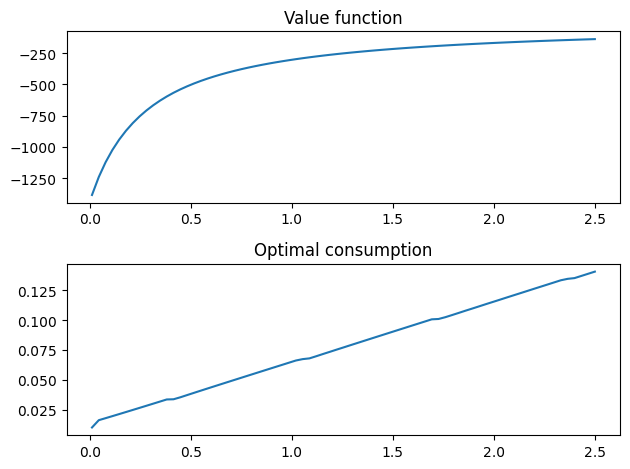

In [ ]:
fig, ax = plt.subplots(2)

ax[0].plot(ce.xgrid, vstar_pf)
ax[0].set_title("Value function")
ax[1].plot(ce.xgrid, cstar_pf)
ax[1].set_title("Optimal consumption")

fig.tight_layout()

In [ ]:
ct_sequence

[0.1339745962155614,
 0.11602540378443868,
 0.10048094716167105,
 0.08701905283832902,
 0.07536071037125329,
 0.06526428962874677,
 0.056520532778439964,
 0.04894821722156007,
 0.04239039958382997,
 0.036711162916170055]

In [ ]:
np.searchsorted(ce.xgrid, 1) # find the index of the value of the array closest to 1

30